# **Import necessary libraries**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Load IMDB dataset**

In [3]:
vocab_size = 10000  # Number of words to keep in vocabulary
max_length = 100  # Maximum review length
embedding_dim = 32
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

## **Data Visualization**

C:\Users\Bedo\AppData\Local\Temp\ipykernel_18428\22109035.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="viridis")


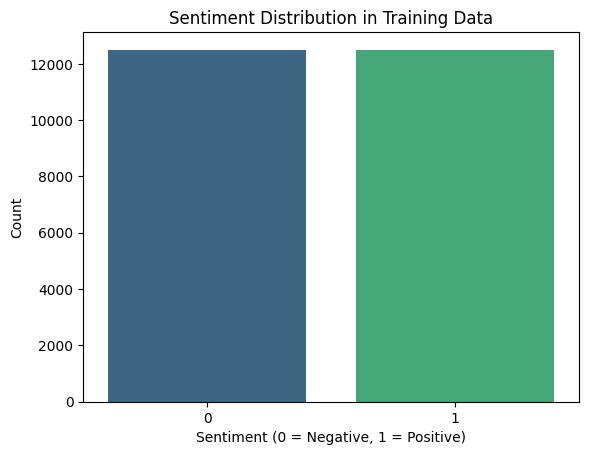

In [4]:
# Check the distribution of sentiment labels
sns.countplot(x=y_train, palette="viridis")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.title("Sentiment Distribution in Training Data")
plt.show()

# **Pad sequences to ensure uniform input size**

In [5]:
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

# **Build the RNN model (using Simple RNN)**

In [ ]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.SimpleRNN(64, return_sequences=False),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

c:\Users\Bedo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# **Compile the model**

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# **Train the model**

In [8]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.5118 - loss: 0.6949 - val_accuracy: 0.6009 - val_loss: 0.6699
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6170 - loss: 0.6613 - val_accuracy: 0.5311 - val_loss: 0.6904
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.6770 - loss: 0.6313 - val_accuracy: 0.6527 - val_loss: 0.6607
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.7964 - loss: 0.4388 - val_accuracy: 0.5132 - val_loss: 0.8385
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8475 - loss: 0.3348 - val_accuracy: 0.5468 - val_loss: 0.9390


## **Training Visualization**

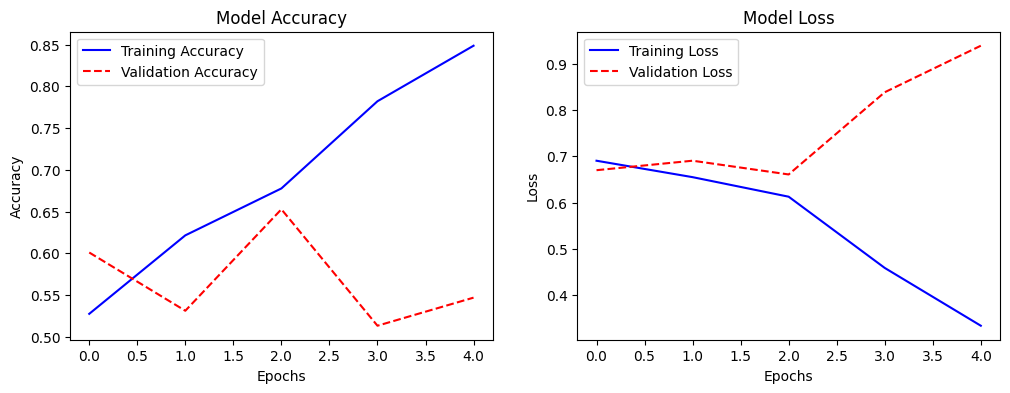

In [9]:
# Plot training history (accuracy and loss)

def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Accuracy plot
    ax[0].plot(history.history['accuracy'], label='Training Accuracy', color='b')
    ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='r', linestyle="--")
    ax[0].set_title("Model Accuracy")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend()

    # Loss plot
    ax[1].plot(history.history['loss'], label='Training Loss', color='b')
    ax[1].plot(history.history['val_loss'], label='Validation Loss', color='r', linestyle="--")
    ax[1].set_title("Model Loss")
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    ax[1].legend()

    plt.show()

plot_training_history(history)

# **Evaluate the model**

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5486 - loss: 0.9356
Test Accuracy: 0.5468


# **Build the RNN model (using LSTM)**

In [ ]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.LSTM(64, return_sequences=False),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# **Compile the model**

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# **Train the model**

In [13]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.6035 - loss: 0.6304 - val_accuracy: 0.7933 - val_loss: 0.4766
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.8487 - loss: 0.3807 - val_accuracy: 0.8069 - val_loss: 0.4581
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8729 - loss: 0.3273 - val_accuracy: 0.8101 - val_loss: 0.4475
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.9187 - loss: 0.2319 - val_accuracy: 0.8076 - val_loss: 0.4795
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step - accuracy: 0.9336 - loss: 0.1947 - val_accuracy: 0.7979 - val_loss: 0.5311


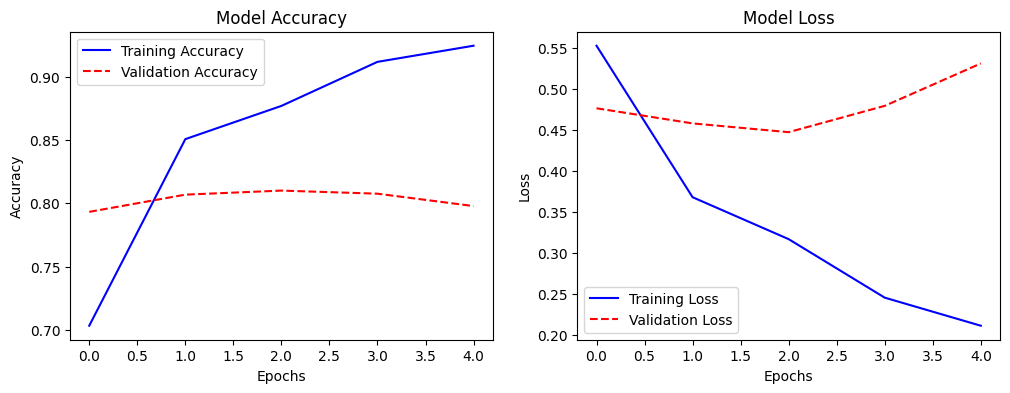

In [14]:
# Plot training history (accuracy and loss)

def plot_training_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Accuracy plot
    ax[0].plot(history.history['accuracy'], label='Training Accuracy', color='b')
    ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='r', linestyle="--")
    ax[0].set_title("Model Accuracy")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend()

    # Loss plot
    ax[1].plot(history.history['loss'], label='Training Loss', color='b')
    ax[1].plot(history.history['val_loss'], label='Validation Loss', color='r', linestyle="--")
    ax[1].set_title("Model Loss")
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    ax[1].legend()

    plt.show()

plot_training_history(history)

# **Evaluate the model**

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7963 - loss: 0.5327
Test Accuracy: 0.7979
